#### Path where the Spark Client is Installed

In [1]:
print("#################The place where the Spark is installed #####################")

!ls /usr/hdp/current/spark2-client/


print("####################The place where the PySpark and py4j is located#########################")

!ls /usr/hdp/current/spark2-client/python/lib

print("##################################################################################")



#################The place where the Spark is installed #####################
aux  conf  doc	     jars     licenses	python	README.md  sbin  yarn
bin  data  examples  LICENSE  NOTICE	R	RELEASE    work
####################The place where the PySpark and py4j is located#########################
py4j-0.10.6-src.zip  PY4J_LICENSE.txt  pyspark.zip
##################################################################################


#### Libraries that help to start Pyspark
* There are two libraries that help to start the pyspark application that are present in the python/lib folder
* pyspark.zip package which has the functionalities of Spark 
* SparkContext uses other package Py4J to launch a JVM and creates a JavaSparkContext object which ultimately communicates with the Spark executor JVMs to load required data

When PySpark's Python interpreter starts, it also starts a JVM with which it communicates through a socket. PySpark uses the Py4J project to handle this communication. The JVM functions as the actual Spark driver, and loads a JavaSparkContext that communicates with the Spark executors across the cluster

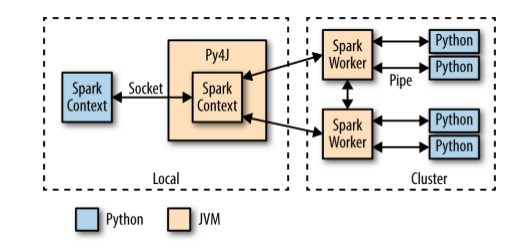

In [2]:
import findspark

In [3]:
findspark.init("/usr/hdp/current/spark2-client")

#### Spark Context
* __SparkContext__ is the entry point of Spark functionality.
* To run any Spark Application a driver program starts, which has the main function and your SparkContext gets initiated here
* It allows your Spark Application to access Spark Cluster with the help of any Resource Manager(Spark Standalone,Yarn)

* If you want to create SparkContext, first __SparkConf__ object should be created.The SparkConf object has a configuration parameter that our Spark driver application will pass to SparkContext. 
* Some of these parameter defines properties of Spark driver application. 
* Some are used by Spark to allocate resources on the cluster, like the number, memory size, and cores used by executor running on the worker nodes.


#### Spark Session

* Its a combination of SQLContext, HiveContext and future streamingContext. All the API’s available on those contexts are available on SparkSession also SparkSession has a spark context for actual computation.

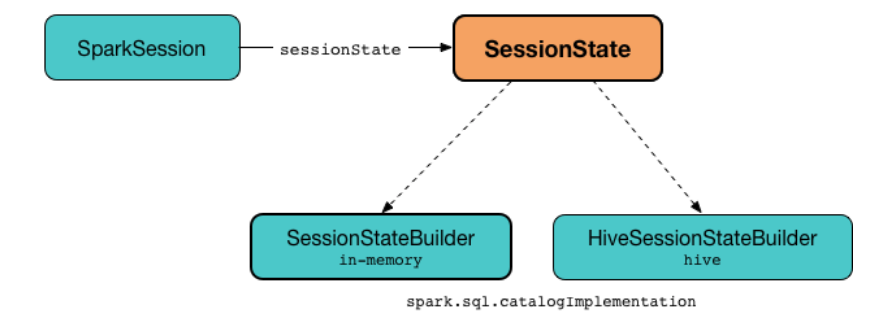

#### So to invoke the functionality of the Spark which requires SparkSession we need to imort the required methods from pyspark.sql class

In [53]:
from pyspark.sql import SparkSession

In [54]:
spark = SparkSession \
    .builder \
    .appName("PySpark RDD  Intro") \
    .config("spark.master", "local[*]") \
    .getOrCreate()

In [55]:
sc = spark.sparkContext

In [56]:
sc._conf.getAll()

[(u'spark.history.kerberos.keytab', u'none'),
 (u'spark.eventLog.enabled', u'true'),
 (u'spark.app.name', u'PySpark RDD  Intro'),
 (u'spark.history.ui.port', u'18081'),
 (u'spark.driver.extraLibraryPath',
  u'/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64'),
 (u'spark.executor.id', u'driver'),
 (u'spark.yarn.queue', u'default'),
 (u'spark.driver.port', u'49381'),
 (u'spark.executor.extraLibraryPath',
  u'/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64'),
 (u'spark.yarn.historyServer.address', u'b.insofe.edu.in:18081'),
 (u'spark.history.fs.logDirectory', u'hdfs:///spark2-history/'),
 (u'spark.app.id', u'local-1555137174703'),
 (u'spark.history.kerberos.principal', u'none'),
 (u'spark.rdd.compress', u'True'),
 (u'spark.history.provider',
  u'org.apache.spark.deploy.history.FsHistoryProvider'),
 (u'spark.serializer.objectStreamReset', u'100'),
 (u'spark.master', u'local[*]'),
 (u'spark.

In [57]:
sc

<SparkContext master=local[*] appName=PySpark RDD  Intro>

* Spark introduces the concept of an RDD (Resilient Distributed Dataset), an
 immutable fault-tolerant, distributed collection of objects that can be operated on
 in parallel. 

* An RDD can contain any type of object and is created by loading an
 external dataset or distributing a collection from the driver program.

### Creating RDD in Pyspark

#####  There are three ways to create an RDD in Spark.

* Parallelizing already existing collection in driver program.
* Referencing a dataset in an external storage system (e.g. HDFS, Hbase, shared file system).
* Creating RDD from already existing RDDs.

In [58]:
data = range(1,101)

In [59]:
type(data)

list

In [60]:
data_RDD = sc.parallelize(data,10)

In [61]:
type(data_RDD)

pyspark.rdd.RDD

In [62]:
data = [("maths",52),("english",75),("science",82), ("computer",65),("maths",85)]

In [63]:
rdd1 = sc.parallelize(data)

In [64]:
type(rdd1)

pyspark.rdd.RDD

In [65]:
rdd1.collect()

[('maths', 52),
 ('english', 75),
 ('science', 82),
 ('computer', 65),
 ('maths', 85)]

#### Read from the local file system (Not windows or Mac it is from the cluster where we need to load the files to using winscp  )

In [66]:
rdd2 = sc.textFile("file:///home/mahidharv/temp_data.txt") 

In [23]:
rdd2.collect()

[u'1901\t-78\t1',
 u'1901\t-72\t1',
 u'1901\t-94\t1',
 u'1901\t-61\t1',
 u'1901\t-56\t1',
 u'1901\t-28\t1',
 u'1901\t-67\t1',
 u'1901\t-33\t1',
 u'1901\t-28\t1',
 u'1901\t-33\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t0\t1',
 u'1901\t6\t1',
 u'1901\t0\t1',
 u'1901\t6\t1',
 u'1901\t6\t1',
 u'1901\t-11\t1',
 u'1901\t-33\t1',
 u'1901\t-50\t1',
 u'1901\t-44\t1',
 u'1901\t-28\t1',
 u'1901\t-33\t1',
 u'1901\t-33\t1',
 u'1901\t-50\t1',
 u'1901\t-33\t1',
 u'1901\t-28\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-50\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-33\t1',
 u'1901\t-22\t1',
 u'1901\t0\t1',
 u'1901\t-6\t1',
 u'1901\t-17\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-33\t1',
 u'1901\t-6\t1',
 u'1901\t17\t1',
 u'1901\t22\t1',
 u'1901\t28\t1',
 u'1901\t28\t1',
 u'1901\t11\t1',
 u'1901\t-17\t1',
 u'1901\t-28\t1',
 u'1901\t-56\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-67\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-2

In [67]:
type(rdd2)

pyspark.rdd.RDD

#### Read the data from HDFS

In [68]:
RDD = sc.textFile("/user/mahidharv/phd")

In [69]:
RDD.take(5)

[u'"ROW_ID","CASE_STATUS","EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat"',
 u'"1","CERTIFIED-WITHDRAWN","UNIVERSITY OF MICHIGAN","BIOCHEMISTS AND BIOPHYSICISTS","POSTDOCTORAL RESEARCH FELLOW","N",36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256',
 u'"2","CERTIFIED-WITHDRAWN","GOODMAN NETWORKS, INC.","CHIEF EXECUTIVES","CHIEF OPERATING OFFICER","Y",242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431',
 u'"3","CERTIFIED-WITHDRAWN","PORTS AMERICA GROUP, INC.","CHIEF EXECUTIVES","CHIEF PROCESS OFFICER","Y",193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575',
 u'"4","CERTIFIED-WITHDRAWN","GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC","CHIEF EXECUTIVES","REGIONAL PRESIDEN, AMERICAS","Y",220314,2016,"DENVER, COLORADO",-104.990251,39.7392358']

### RDDs support two types of operations:
* Transformations are operations (such as map, filter, join, union, and so on) that are performed on an RDD and which yield a new RDD containing the result.

* Actions are operations (such as reduce, count, first, and so on) that return a value after running a computation on an RDD.

* Transformations in Spark are “lazy”, meaning that they do not compute their results right away. 
* They just “remember” the operation to be performed and the dataset (e.g., file) to which the operation is to be    performed. 
* The transformations are only actually computed when an action is called and the result is returned to the driver program. 
* This design enables Spark to run more efficiently. For example, if a big file was transformed in various ways and passed to first action, Spark would only process and return the result for the first line, rather than do the work for the entire file.

### Transformations

* Map Transformation

In [70]:
intRdd = sc.parallelize([10, 20, 30, 40, 50])

In [71]:
mapRDD = intRdd.map(lambda x : x**2)
mapRDD.collect()

[100, 400, 900, 1600, 2500]

* Filter(Transformation):
    
* The filter operation evaluates a Boolean function for each data item of the RDD
 and puts the items for which the function returned true into the resulting RDD. Filter
 is a Transformation. Collect is an Action.

In [72]:
numRdd = sc.parallelize([11,12,13,14,15,16,17,18])
filterRdd1 = numRdd.filter(lambda x : x%2 == 1)
filterRdd1.collect()

[11, 13, 15, 17]

In [73]:
filterRdd2 = numRdd.filter(lambda x : x%2 == 0)
filterRdd2.collect()

[12, 14, 16, 18]

* ReduceByKey (Transformation):
* Spark RDD reduceByKey function merges the values for each key using an associative reduce function. Basically reduceByKey function works only for RDDs which contains key and value pairs kind of elements (i.e. RDDs having tuple or Map as a data element).

In [74]:
x = sc.parallelize([("comp", 1), ("tab", 1), ("comp", 1), ("comp", 1),
("tab", 1), ("tab", 1), ("tab", 1), ("tab", 1)])

In [75]:
x.collect()

[('comp', 1),
 ('tab', 1),
 ('comp', 1),
 ('comp', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1)]

In [76]:
y = x.reduceByKey(lambda a, b: a + b)

In [77]:
y.collect()

[('comp', 3), ('tab', 5)]

* flatMap (Transformation) :
* Spark flatMap function returns a new RDD by first applying a function to all elements of this RDD, and then flattening the results.

In [78]:
sc.parallelize([3,4,5]).map(lambda x: range(1,x)).collect()

[[1, 2], [1, 2, 3], [1, 2, 3, 4]]

In [79]:
sc.parallelize([3,4,5]).flatMap(lambda x: range(1,x)).collect()

[1, 2, 1, 2, 3, 1, 2, 3, 4]

In [80]:
sentRdd = sc.parallelize(["Welcome to Batch 56.", "This is Lab Session","We are doing pySpark Activity"])

In [81]:
sentRdd.map(lambda x: x.split(' ')).collect()

[['Welcome', 'to', 'Batch', '56.'],
 ['This', 'is', 'Lab', 'Session'],
 ['We', 'are', 'doing', 'pySpark', 'Activity']]

In [82]:
wordlist = sentRdd.flatMap(lambda x: x.split(' ')).collect()

In [83]:
type(wordlist)

list

In [84]:
wordlist

['Welcome',
 'to',
 'Batch',
 '56.',
 'This',
 'is',
 'Lab',
 'Session',
 'We',
 'are',
 'doing',
 'pySpark',
 'Activity']

* groupByKey(Transformation):
* Spark groupByKey function returns a new RDD. The returned RDD gives back an object which allows to iterate over the results. The results of groupByKey returns a list by calling list() on values.

In [85]:
example = sc.parallelize([('x',1), ('x',1), ('y', 1), ('z', 1)])

In [86]:
example.collect()

[('x', 1), ('x', 1), ('y', 1), ('z', 1)]

In [87]:
example.groupByKey().collect()

[('y', <pyspark.resultiterable.ResultIterable at 0x38e8450>),
 ('x', <pyspark.resultiterable.ResultIterable at 0x38ef510>),
 ('z', <pyspark.resultiterable.ResultIterable at 0x38ef150>)]

In [88]:
itRdd = example.groupByKey()

In [89]:
itRdd.map(lambda x :(x[0], list(x[1]))).collect()

[('y', [1]), ('x', [1, 1]), ('z', [1])]

* groupBy (Transformation) :
* groupBy function returns an RDD of grouped items. This operation will return the new RDD which basically is made up with a KEY (which is a group) and list of items of that group (in a form of Iterator). Order of element within the group may not same when you apply the same operation on the same RDD over and over.

In [90]:
namesRdd = sc.parallelize(["Joseph", "Jimmy", "Tina","Thomas","James","Cory","Christine", "Jackeline", "Juan"])

In [91]:
namesRdd.collect()

['Joseph',
 'Jimmy',
 'Tina',
 'Thomas',
 'James',
 'Cory',
 'Christine',
 'Jackeline',
 'Juan']

In [92]:
result =namesRdd.groupBy(lambda word: word[0]).collect()

In [93]:
result

[('C', <pyspark.resultiterable.ResultIterable at 0x34e5350>),
 ('J', <pyspark.resultiterable.ResultIterable at 0x34ef750>),
 ('T', <pyspark.resultiterable.ResultIterable at 0x34ef890>)]

In [94]:
[(x, sorted(y)) for (x, y) in result]

[('C', ['Christine', 'Cory']),
 ('J', ['Jackeline', 'James', 'Jimmy', 'Joseph', 'Juan']),
 ('T', ['Thomas', 'Tina'])]

* mapValues (Transformation) :
* Apply a function to each value of a pair RDD without changing the key.

In [95]:
namesRdd = sc.parallelize(["dog", "tiger", "lion", "cat", "panther","eagle"])
pairRdd = namesRdd.map(lambda x :(len(x), x))

In [96]:
pairRdd.collect()

[(3, 'dog'),
 (5, 'tiger'),
 (4, 'lion'),
 (3, 'cat'),
 (7, 'panther'),
 (5, 'eagle')]

In [97]:
result = pairRdd.mapValues(lambda y: "Animal name is " + y)
result.collect()

[(3, 'Animal name is dog'),
 (5, 'Animal name is tiger'),
 (4, 'Animal name is lion'),
 (3, 'Animal name is cat'),
 (7, 'Animal name is panther'),
 (5, 'Animal name is eagle')]

* join (pair Rdd Transformation): 

In [98]:
rdd1 = sc.parallelize([("red",20),("red",30),("blue", 100)])
rdd2 = sc.parallelize([("red",40),("red",50),("yellow", 10000)])

In [99]:
rdd1.join(rdd2).collect()

[('red', (20, 40)), ('red', (20, 50)), ('red', (30, 40)), ('red', (30, 50))]

* inner join and outer join (Transformation)

In [100]:
rdd1 = sc.parallelize([("Mercedes", "E-Class"), ("Toyota", "Corolla"),("Renault", "Duster")])
rdd2 = sc.parallelize([("Mercedes", "C-Class"), ("Toyota", "Prius"),("Toyota", "Etios")])

In [101]:
innerJoinRdd = rdd1.join(rdd2)
innerJoinRdd.collect()

[('Mercedes', ('E-Class', 'C-Class')),
 ('Toyota', ('Corolla', 'Prius')),
 ('Toyota', ('Corolla', 'Etios'))]

In [102]:
outerJoinRdd = rdd1.leftOuterJoin(rdd2)
outerJoinRdd.collect()

[('Renault', ('Duster', None)),
 ('Mercedes', ('E-Class', 'C-Class')),
 ('Toyota', ('Corolla', 'Prius')),
 ('Toyota', ('Corolla', 'Etios'))]

* Union:
* Combines the values in various Rdds to form a cohesive unit

In [103]:
d1= [('k1', 1), ('k2', 2), ('k3', 5)]
d2= [('k1', 3), ('k2',4), ('k4', 8)]

In [104]:
d1_RDD = sc.parallelize(d1)
d2_RDD = sc.parallelize(d2)

In [105]:
d3_union = d1_RDD.union(d2_RDD)

In [106]:
d3_union.collect()

[('k1', 1), ('k2', 2), ('k3', 5), ('k1', 3), ('k2', 4), ('k4', 8)]

## Actions

* collect (Action):
* Collect action returns the results or the value. When an action is called transformations are executed.

In [107]:
rdd1 = sc.textFile('/user/mahidharv/input.txt')

In [108]:
rdd1.collect()

[u'"Hello Batch"', u'"How are you doing"', u'"Hope All is Well"']

In [109]:
rdd1.first()

u'"Hello Batch"'

In [110]:
rdd1.take(2)

[u'"Hello Batch"', u'"How are you doing"']

* takeOrdered(Action):
* Orders the data items of the RDD using their inherent implicit ordering function and returns the first n items as an array.

In [111]:
rdd1 = sc.parallelize(["dog", "cat", "ape", "salmon", "gnu"])
rdd1.takeOrdered(3)

['ape', 'cat', 'dog']

* reduce (Action):
* This function provides the well-known reduce functionality in Spark. Please note that any function f you provide, should be commutative in order to generate reproducible results.

In [112]:
intVals = range(1,15)
numRdd = sc.parallelize(intVals)
cSum = numRdd.reduce(lambda a, b: a + b)

In [113]:
cSum

105

* Broadcast Variables

In [114]:
my_collection = "Postgraduate Program in Big Data Analytics and Optimization"\
  .split(" ")
    
words = sc.parallelize(my_collection)

In [115]:
words.getNumPartitions()

8

In [116]:
supplementalData = {"Postgraduate":1000, "Analytics":200, "Optimization": 400,
                    "Big":-300, "Data": 100, "Program":100}

In [117]:
suppBroadcast = sc.broadcast(supplementalData)

In [119]:
dir(suppBroadcast)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_jbroadcast',
 '_path',
 '_pickle_registry',
 '_value',
 'destroy',
 'dump',
 'load',
 'unpersist',
 'value']

In [118]:
suppBroadcast.value

{'Analytics': 200,
 'Big': -300,
 'Data': 100,
 'Optimization': 400,
 'Postgraduate': 1000,
 'Program': 100}

In [120]:
words.map(lambda word: (word, suppBroadcast.value.get(word, 0))).collect()

[('Postgraduate', 1000),
 ('Program', 100),
 ('in', 0),
 ('Big', -300),
 ('Data', 100),
 ('Analytics', 200),
 ('and', 0),
 ('Optimization', 400)]

In [121]:
words.map(lambda word: (word, suppBroadcast.value.get(word, 0)))\
  .sortBy(lambda wordPair: wordPair[1])\
  .collect()

[('Big', -300),
 ('in', 0),
 ('and', 0),
 ('Program', 100),
 ('Data', 100),
 ('Analytics', 200),
 ('Optimization', 400),
 ('Postgraduate', 1000)]

* Accumulators

In [122]:
count = sc.accumulator(0)

In [123]:
count.value

0

In [124]:
result = sc.parallelize([1,2,3])

In [125]:
def f(x):
    global count
    count += x

In [126]:
result.foreach(f)

In [127]:
count.value

6

#### Some more transformation  and actions

* glom() - Return an RDD created by coalescing all elements within each partition into a list.

In [128]:
data_RDD.glom().collect()

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
 [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
 [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
 [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
 [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]]

* coalesce() - Return a new RDD that is reduced into numPartitions partitions.

In [129]:
RDD = RDD.coalesce(2)
RDD.glom().collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 64.0 failed 1 times, most recent failure: Lost task 0.0 in stage 64.0 (TID 517, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space
	at java.util.Arrays.copyOf(Arrays.java:3236)
	at java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:118)
	at java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:93)
	at java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:153)
	at org.apache.spark.util.ByteBufferOutputStream.write(ByteBufferOutputStream.scala:41)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.setBlockDataMode(ObjectOutputStream.java:1786)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1189)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:43)
	at org.apache.spark.serializer.JavaSerializerInstance.serialize(JavaSerializer.scala:100)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:393)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1587)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1586)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1586)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1820)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1769)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1758)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor53.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at java.util.Arrays.copyOf(Arrays.java:3236)
	at java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:118)
	at java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:93)
	at java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:153)
	at org.apache.spark.util.ByteBufferOutputStream.write(ByteBufferOutputStream.scala:41)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.setBlockDataMode(ObjectOutputStream.java:1786)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1189)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:43)
	at org.apache.spark.serializer.JavaSerializerInstance.serialize(JavaSerializer.scala:100)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:393)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 53741)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib64/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib64/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib64/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib64/python2.7/SocketServer.py", line 649, in __init__
    self.handle()
  File "/usr/hdp/current/spark2-client/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/usr/hdp/current/spark2-client/python/pyspark/serializers.py", line 685, in read_int
    raise EOFError
EOFError


* repartition() - Return a new RDD that has exactly numPartitions partitions.

- Can increase or decrease the level of parallelism in this RDD. Internally, this uses a shuffle to redistribute data. If you are decreasing the number of partitions in this RDD, consider using coalesce, which can avoid performing a shuffle

In [ ]:
RDD_par = RDD.repartition(2)
RDD_par.glom().collect()

* combineByKey(createCombiner,mergeValue,mergeCombiners)

In [ ]:
nums = [(1,2),(3,4),(3,6)]
numsRDD = sc.parallelize(nums,3)
numsRDD.glom().collect()

In [ ]:
sumCount = numsRDD.combineByKey(createCombiner=lambda x :(x,1),mergeValue=lambda x,y:(x[0]+y,x[1]+1),mergeCombiners=lambda x,y:(x[0]+y[0],x[1]+y[1]),numPartitions=3)

In [ ]:
sumCount.collect()

#### Creating Custom Partitioner

In [ ]:
transactions = [
    {'name': 'Bob', 'amount': 100, 'country': 'United Kingdom'},
    {'name': 'James', 'amount': 15, 'country': 'United Kingdom'},
    {'name': 'Marek', 'amount': 51, 'country': 'Poland'},
    {'name': 'Paul', 'amount': 75, 'country': 'Poland'},
]

In [ ]:
def country_partitioner(country):
    return hash(country)

In [ ]:
country_partitioner('United Kingdom')

In [ ]:
rdd = sc.parallelize(transactions) \
        .map(lambda el: (el['country'], el)) \
        .partitionBy(4, country_partitioner)
print("##################################################################################")    
print("Number of partitions: {}".format(rdd.getNumPartitions()))
print("##################################################################################")
print("Partitioner: {}".format(rdd.partitioner))
print("##################################################################################")
print("Partitions structure: {}".format(rdd.glom().collect()))
print("##################################################################################")
[i for i in rdd.glom().collect()]

####  Activity

In [ ]:
textdata =sc.textFile('file:///home/mahidharv/academics/Batch56/CSE7322c/20190411_Batch56_CSE7322c_Lab02_SparkRDD_MR_SQL/textData/washingtonData.txt')

In [ ]:
textdata.collect()

In [ ]:
word_tokens = textdata.flatMap(lambda line: line.split(' '))\
                        .map(lambda word: (word, 1))\
                        .reduceByKey(lambda a, b: a + b) 

In [ ]:
word_tokens.collect()

In [ ]:
# displaying the number of words
word_tokens.count()

In [ ]:
# Sorting the words and count based on key
sorted = word_tokens.sortByKey(ascending=True)

In [ ]:
sorted.collect()